In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
X,y=make_classification(n_features=5,n_informative=5,n_clusters_per_class=1,n_redundant=0)

In [3]:
df=pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])

In [4]:
df['target']=y

In [5]:
print(df.shape)

(100, 6)


In [6]:
df.head()

,col1,col2,col3,col4,col5,target
0,-1.911919,-0.762523,5.123653,-1.060458,2.017742,1
1,-0.632405,-0.605752,1.238483,0.836564,-0.172432,1
2,-1.353923,-2.675172,-0.892681,-1.689474,0.732961,1
3,0.034200,-2.549609,0.969185,-1.959644,2.171442,1
4,0.346919,0.556248,0.573327,-0.567095,-1.341263,0


In [7]:
#Function for row sampling
def sample_rows(df,percent):
    return df.sample(int(percent*df.shape[0]),replace=True)

In [8]:
#Function for feature sampling
def sample_features(df,percent):
    cols=random.sample(df.columns.tolist()[:-1],int(percent*(df.shape[1])-1))
    new_df=df[cols]
    new_df['target']=df['target']
    return new_df

In [9]:
#Feature for combined sampling
def combined_sampling(df,row_percent,col_percent):
    new_df=sample_rows(df,row_percent)
    return sample_features(new_df,col_percent)

In [10]:
df1=sample_rows(df,0.1)

In [11]:
df1

,col1,col2,col3,col4,col5,target
80,0.427804,1.812486,-0.449987,-0.773740,-1.134233,0
48,-0.026432,2.760793,-0.838266,-0.380432,0.259546,0
68,2.578641,1.933131,0.124753,0.784609,-0.787795,0
8,-0.543582,-0.130497,0.756018,-0.365992,0.543169,1
56,2.074592,1.495747,0.890429,-2.076459,-1.586209,0
26,0.149776,2.011578,-0.489826,-0.983798,-0.726805,0
45,2.150434,2.361204,-1.190362,-0.054702,-1.655022,0
20,-0.592023,-2.684393,1.311754,-0.391115,0.937447,1
12,-3.607425,-1.248863,3.197398,-2.236530,1.576057,1
37,1.514529,1.422112,-0.043784,-3.674820,-2.981862,0


In [12]:
df2=sample_rows(df,0.1)

In [13]:
df2

,col1,col2,col3,col4,col5,target
42,1.365972,1.460692,-0.641566,-2.481076,-2.950826,0
88,-2.103321,-1.295632,0.957275,-1.966898,1.269272,1
81,0.528648,0.331062,2.728433,-1.756593,0.027692,0
51,-2.128889,-2.931350,2.315170,-1.014773,1.159489,1
10,-0.430268,-0.757129,-0.158505,-0.829967,0.655725,1
47,0.563927,-1.471840,1.667156,-0.635387,1.623295,1
82,0.458040,1.012465,-0.702814,-0.383753,-1.939651,0
74,-2.054934,-2.793022,-0.134450,-1.716903,0.765144,1
75,1.887479,1.175245,0.951114,-0.319540,-0.983595,0
59,1.120437,-1.393579,0.173663,-1.227428,1.814078,1


In [14]:
df3=sample_rows(df,0.1)

In [15]:
df3

,col1,col2,col3,col4,col5,target
75,1.887479,1.175245,0.951114,-0.319540,-0.983595,0
8,-0.543582,-0.130497,0.756018,-0.365992,0.543169,1
59,1.120437,-1.393579,0.173663,-1.227428,1.814078,1
95,1.486282,1.369605,2.832601,0.186963,1.631610,0
23,0.855500,1.424934,1.058398,-1.723996,-0.713466,0
67,-1.830423,-0.096396,2.635433,-1.134116,1.209465,1
52,-0.327467,-0.123918,0.228996,-0.543890,-2.142770,0
16,-1.704175,-0.733755,1.016852,-1.564562,1.037502,1
17,-0.636408,1.139369,0.962776,-1.044475,0.057681,0
63,0.200796,-0.745624,0.066973,-0.334229,0.741096,1


In [16]:
clf1=DecisionTreeClassifier()
clf2=DecisionTreeClassifier()
clf3=DecisionTreeClassifier()

In [17]:
clf1.fit(df1.iloc[:,0:5],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:5],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:5],df3.iloc[:,-1])

DecisionTreeClassifier()

[Text(0.5, 0.75, 'x[4] <= 0.401\ngini = 0.42\nsamples = 10\nvalue = [7, 3]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]')]

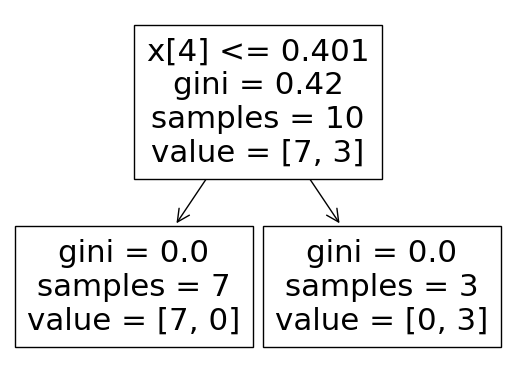

In [18]:
plot_tree(clf1,max_depth=None)

[Text(0.5, 0.75, 'x[1] <= -0.213\ngini = 0.48\nsamples = 10\nvalue = [4, 6]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]')]

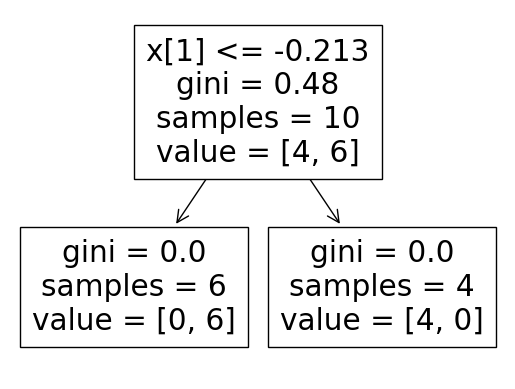

In [19]:
plot_tree(clf2,max_depth=1)

[Text(0.4, 0.8333333333333334, 'x[4] <= 0.3\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.6, 0.5, 'x[3] <= -0.074\ngini = 0.278\nsamples = 6\nvalue = [1, 5]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]')]

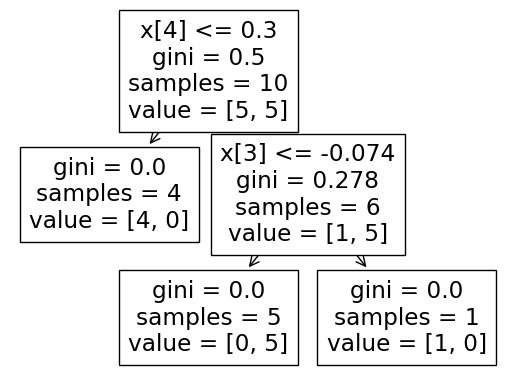

In [20]:
plot_tree(clf3,max_depth=None)

In [21]:
clf1.predict(np.array([-2.030660,-1.554857,-0.805521,1.967310,0.121917]).reshape(1,5))

array([0])

In [22]:
clf2.predict(np.array([-2.030660,-1.554857,-0.805521,1.967310,0.121917]).reshape(1,5))

array([1])

In [23]:
clf3.predict(np.array([-2.030660,-1.554857,-0.805521,1.967310,0.121917]).reshape(1,5))

array([0])

In [24]:
df1=sample_features(df,0.7)

In [25]:
df2=sample_features(df,0.7)

In [26]:
df3=sample_features(df,0.7)
df3

,col2,col1,col4,target
0,-0.762523,-1.911919,-1.060458,1
1,-0.605752,-0.632405,0.836564,1
2,-2.675172,-1.353923,-1.689474,1
3,-2.549609,0.034200,-1.959644,1
4,0.556248,0.346919,-0.567095,0
...,...,...,...,...
95,1.369605,1.486282,0.186963,0
96,-0.063960,0.807801,-0.689954,0
97,-0.546293,-1.255826,-1.209888,0
98,-0.483048,-0.509128,-1.161782,1


[Text(0.5, 0.8333333333333334, 'x[1] <= 0.35\ngini = 0.5\nsamples = 100\nvalue = [51, 49]'),
 Text(0.25, 0.5, 'x[0] <= -1.33\ngini = 0.177\nsamples = 51\nvalue = [46, 5]'),
 Text(0.125, 0.16666666666666666, '\n  (...)  \n'),
 Text(0.375, 0.16666666666666666, '\n  (...)  \n'),
 Text(0.75, 0.5, 'x[0] <= 1.179\ngini = 0.183\nsamples = 49\nvalue = [5, 44]'),
 Text(0.625, 0.16666666666666666, '\n  (...)  \n'),
 Text(0.875, 0.16666666666666666, '\n  (...)  \n')]

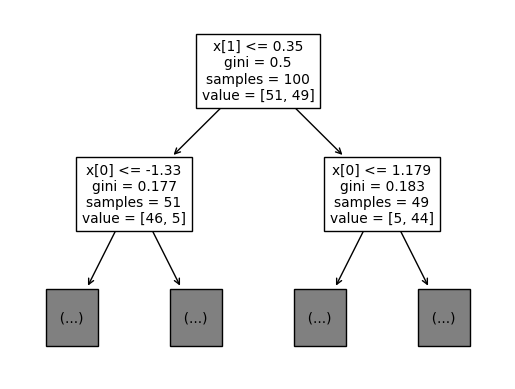

In [27]:
clf1.fit(df1.iloc[:,0:3],df1.iloc[:,-1])
plot_tree(clf1,max_depth=1)

[Text(0.4166666666666667, 0.9166666666666666, 'x[1] <= 0.35\ngini = 0.5\nsamples = 100\nvalue = [51, 49]'),
 Text(0.13333333333333333, 0.75, 'x[0] <= -1.33\ngini = 0.177\nsamples = 51\nvalue = [46, 5]'),
 Text(0.06666666666666667, 0.5833333333333334, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.2, 0.5833333333333334, 'x[0] <= -0.419\ngini = 0.08\nsamples = 48\nvalue = [46, 2]'),
 Text(0.13333333333333333, 0.4166666666666667, 'x[0] <= -0.634\ngini = 0.444\nsamples = 6\nvalue = [4, 2]'),
 Text(0.06666666666666667, 0.25, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.2, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.26666666666666666, 0.4166666666666667, 'gini = 0.0\nsamples = 42\nvalue = [42, 0]'),
 Text(0.7, 0.75, 'x[0] <= 1.179\ngini = 0.183\nsamples = 49\nvalue = [5, 44]'),
 Text(0.5333333333333333, 0.5833333333333334, 'x[2] <= 3.659\ngini = 0.085\nsamples = 45\nvalue = [2, 43]'),
 Text(0.4, 0.4166666666666667, 'x[1] <= 0.612\ngini = 0.045\nsamples = 43\nvalue =

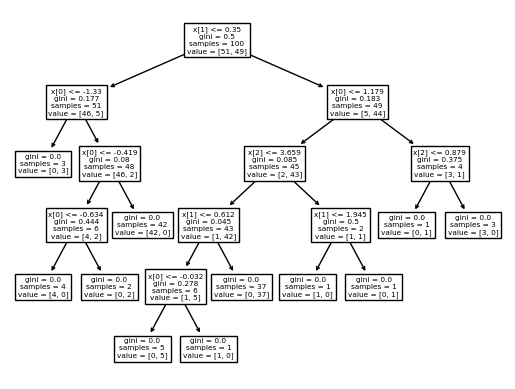

In [28]:
clf2.fit(df1.iloc[:,0:3],df1.iloc[:,-1])
plot_tree(clf2)

[Text(0.4166666666666667, 0.9166666666666666, 'x[1] <= 0.35\ngini = 0.5\nsamples = 100\nvalue = [51, 49]'),
 Text(0.13333333333333333, 0.75, 'x[0] <= -1.33\ngini = 0.177\nsamples = 51\nvalue = [46, 5]'),
 Text(0.06666666666666667, 0.5833333333333334, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.2, 0.5833333333333334, 'x[0] <= -0.419\ngini = 0.08\nsamples = 48\nvalue = [46, 2]'),
 Text(0.13333333333333333, 0.4166666666666667, 'x[0] <= -0.634\ngini = 0.444\nsamples = 6\nvalue = [4, 2]'),
 Text(0.06666666666666667, 0.25, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.2, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.26666666666666666, 0.4166666666666667, 'gini = 0.0\nsamples = 42\nvalue = [42, 0]'),
 Text(0.7, 0.75, 'x[0] <= 1.179\ngini = 0.183\nsamples = 49\nvalue = [5, 44]'),
 Text(0.5333333333333333, 0.5833333333333334, 'x[2] <= 3.659\ngini = 0.085\nsamples = 45\nvalue = [2, 43]'),
 Text(0.4, 0.4166666666666667, 'x[1] <= 0.612\ngini = 0.045\nsamples = 43\nvalue =

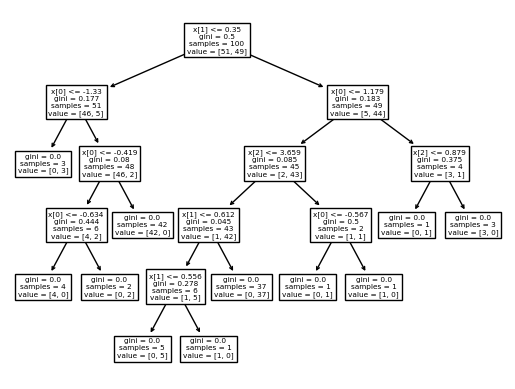

In [29]:
clf3.fit(df1.iloc[:,0:3],df1.iloc[:,-1])
plot_tree(clf3)

In [30]:
clf1.predict(np.array([-1.491902,2.573114,-0.248336]).reshape(1,3))

array([1])

In [31]:
clf2.predict(np.array([-1.491902,2.573114,-0.248336]).reshape(1,3))

array([1])

In [32]:
clf3.predict(np.array([-1.491902,2.573114,-0.248336]).reshape(1,3))

array([1])

In [33]:
df1=combined_sampling(df,0.5,0.5)
df1.shape
df1

,col3,col4,target
52,0.228996,-0.543890,0
98,-0.150070,-1.161782,1
57,-2.010458,-0.975150,1
29,-0.019214,-1.065715,0
4,0.573327,-0.567095,0
78,-0.010775,-0.415521,1
22,1.354678,0.231999,0
34,1.437972,-1.174144,1
78,-0.010775,-0.415521,1
11,1.050121,0.375786,0


In [34]:
df2=combined_sampling(df,0.5,0.5)
df2

,col5,col1,target
63,0.741096,0.200796,1
31,0.792543,1.238430,0
66,-1.645355,0.017849,0
30,0.353377,-0.307380,1
41,0.732814,0.537058,1
60,2.077127,-1.727997,1
26,-0.726805,0.149776,0
41,0.732814,0.537058,1
26,-0.726805,0.149776,0
73,-0.131979,-1.977848,1


In [35]:
df3=combined_sampling(df,0.5,0.5)

[Text(0.23529411764705882, 0.95, 'x[1] <= -2.146\ngini = 0.493\nsamples = 50\nvalue = [28.0, 22.0]'),
 Text(0.17647058823529413, 0.85, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.29411764705882354, 0.85, 'x[1] <= -1.152\ngini = 0.499\nsamples = 46\nvalue = [24, 22]'),
 Text(0.17647058823529413, 0.75, 'x[1] <= -1.694\ngini = 0.355\nsamples = 13\nvalue = [3, 10]'),
 Text(0.11764705882352941, 0.65, 'x[0] <= 1.218\ngini = 0.5\nsamples = 6\nvalue = [3, 3]'),
 Text(0.058823529411764705, 0.55, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.17647058823529413, 0.55, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.23529411764705882, 0.65, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(0.4117647058823529, 0.75, 'x[1] <= -1.063\ngini = 0.463\nsamples = 33\nvalue = [21, 12]'),
 Text(0.35294117647058826, 0.65, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.47058823529411764, 0.65, 'x[0] <= 0.057\ngini = 0.48\nsamples = 30\nvalue = [18, 12]'),
 Text(0.35294117647058826, 0.55,

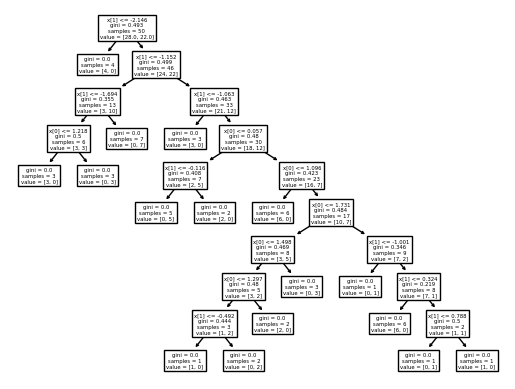

In [42]:
clf1.fit(df1.iloc[:,0:2],df1.iloc[:,-1])
plot_tree(clf1)

[Text(0.35, 0.9444444444444444, 'x[1] <= -0.009\ngini = 0.493\nsamples = 50\nvalue = [28.0, 22.0]'),
 Text(0.15, 0.8333333333333334, 'x[0] <= 0.909\ngini = 0.386\nsamples = 23\nvalue = [17, 6]'),
 Text(0.1, 0.7222222222222222, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(0.2, 0.7222222222222222, 'x[1] <= -1.871\ngini = 0.48\nsamples = 15\nvalue = [9, 6]'),
 Text(0.1, 0.6111111111111112, 'x[1] <= -3.148\ngini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(0.05, 0.5, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.15, 0.5, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.3, 0.6111111111111112, 'x[1] <= -1.442\ngini = 0.494\nsamples = 9\nvalue = [4, 5]'),
 Text(0.25, 0.5, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.35, 0.5, 'x[0] <= 0.988\ngini = 0.444\nsamples = 6\nvalue = [4, 2]'),
 Text(0.3, 0.3888888888888889, 'x[0] <= 0.938\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.25, 0.2777777777777778, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.35, 0.2777777

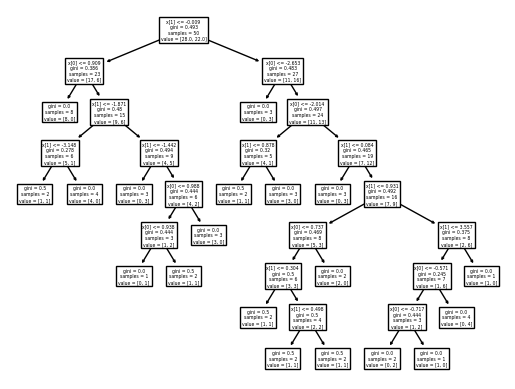

In [43]:
clf2.fit(df2.iloc[:,0:2],df1.iloc[:,-1])
plot_tree(clf2)

[Text(0.6142857142857143, 0.9583333333333334, 'x[0] <= 1.415\ngini = 0.493\nsamples = 50\nvalue = [28.0, 22.0]'),
 Text(0.4, 0.875, 'x[1] <= -0.143\ngini = 0.494\nsamples = 38\nvalue = [17.0, 21.0]'),
 Text(0.2, 0.7916666666666666, 'x[0] <= -2.654\ngini = 0.499\nsamples = 27\nvalue = [14, 13]'),
 Text(0.14285714285714285, 0.7083333333333334, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.2571428571428571, 0.7083333333333334, 'x[0] <= -1.499\ngini = 0.497\nsamples = 26\nvalue = [14, 12]'),
 Text(0.2, 0.625, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.3142857142857143, 0.625, 'x[0] <= -1.345\ngini = 0.499\nsamples = 23\nvalue = [11, 12]'),
 Text(0.2571428571428571, 0.5416666666666666, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.37142857142857144, 0.5416666666666666, 'x[1] <= -0.452\ngini = 0.499\nsamples = 21\nvalue = [11, 10]'),
 Text(0.22857142857142856, 0.4583333333333333, 'x[1] <= -1.862\ngini = 0.49\nsamples = 14\nvalue = [6, 8]'),
 Text(0.17142857142857143, 0.3

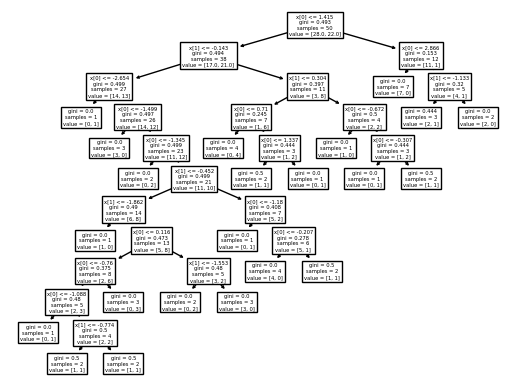

In [44]:
clf3.fit(df3.iloc[:,0:2],df1.iloc[:,-1])
plot_tree(clf3)

In [45]:
clf1.predict(np.array([1.808394,-0.181378]).reshape(1,2))

array([0])

In [46]:
clf2.predict(np.array([1.808394,-0.181378]).reshape(1,2))

array([0])

In [47]:
clf3.predict(np.array([1.808394,-0.181378]).reshape(1,2))

array([0])